In [224]:
## Download the dataset from below link
## https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [5]:
# importing data
loan_train = pd.read_csv("train_loan.csv")
loan_test = pd.read_csv("test_loan.csv")

In [132]:
# making copy of the data
train_original=loan_train.copy() 
test_original=loan_test.copy()

In [133]:
train_original.shape

(614, 13)

In [134]:
test_original.shape

(367, 12)

In [135]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [136]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [137]:
train_original.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [138]:
train_original.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [139]:
test_original.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [140]:
train_original['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

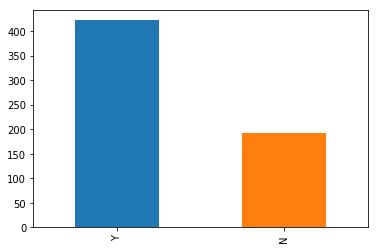

In [141]:
train_original['Loan_Status'].value_counts().plot.bar()

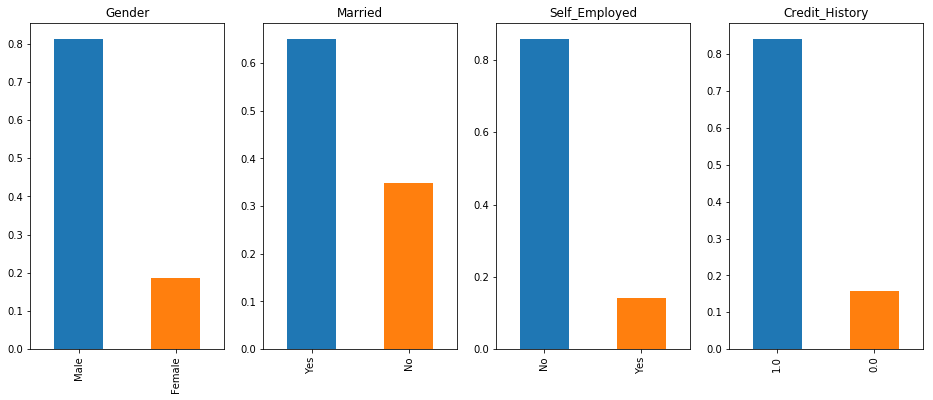

In [142]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 6))
train_original['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',ax = axs[0]) 
train_original['Married'].value_counts(normalize=True).plot.bar(title= 'Married', ax = axs[1]) 
train_original['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed', ax = axs[2]) 
train_original['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History', ax = axs[3]) 
plt.show()

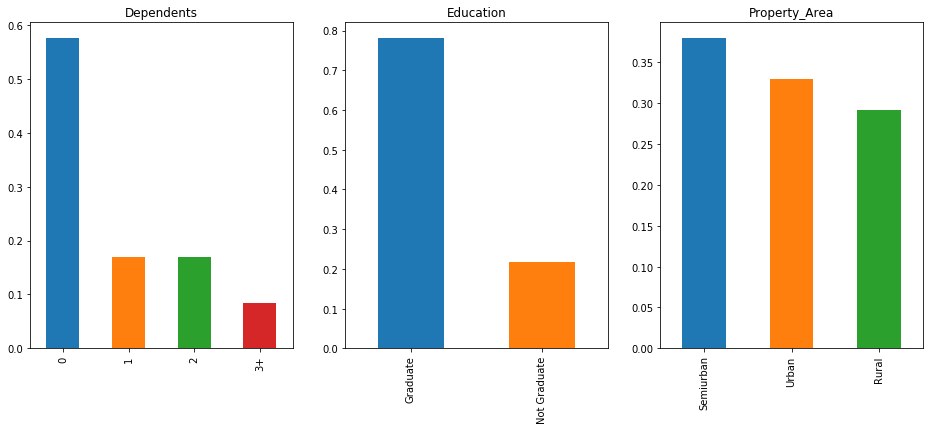

In [143]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 6))
train_original['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents',ax = axs[0]) 
train_original['Education'].value_counts(normalize=True).plot.bar(title= 'Education', ax = axs[1]) 
train_original['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area', ax = axs[2]) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


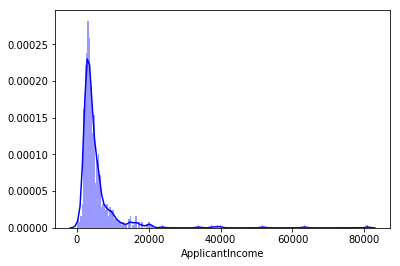

In [144]:
sns.set_color_codes("pastel")
sns.distplot(train_original['ApplicantIncome'],kde=True,bins=200, color="blue")

In [145]:
train_original['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

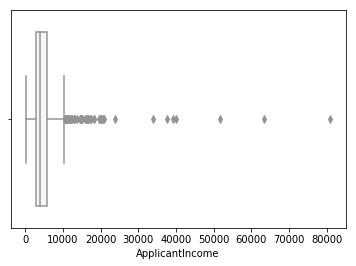

In [146]:
sns.boxplot(train_original['ApplicantIncome'],palette="PRGn",showfliers=True)

In [147]:
## data has lot of outliers
## This can be attributed to the income disparity in the society. 
## Part of this can be driven by the fact that we are looking at people with different education levels

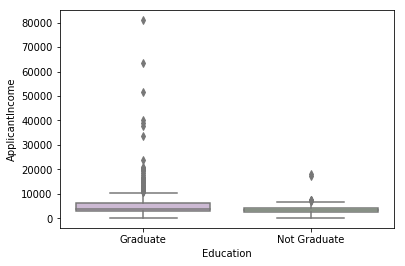

In [148]:
sns.boxplot( x='Education', y='ApplicantIncome',data=train_original, palette="PRGn",showfliers=True)

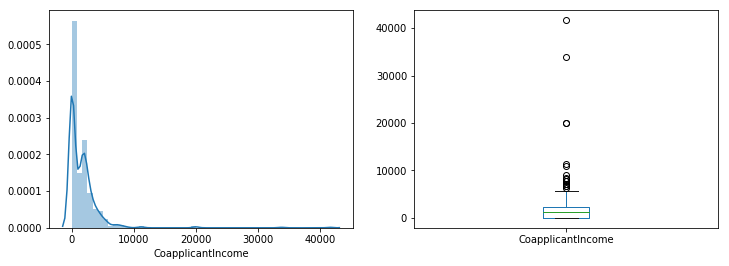

In [149]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4)) 
sns.distplot(train_original['CoapplicantIncome'],ax = axs[0]) 
train_original['CoapplicantIncome'].plot.box(ax = axs[1]) 
plt.show()

In [150]:
train_original['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

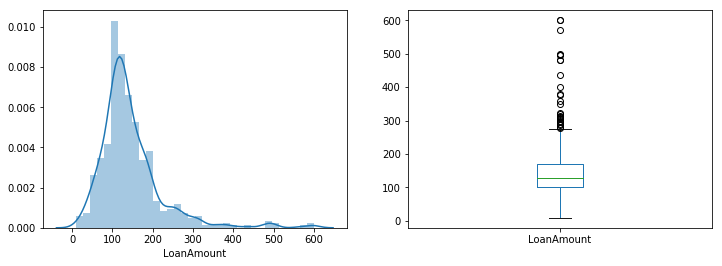

In [151]:
df = train_original.dropna()
fig, axs = plt.subplots(ncols=2, figsize=(12, 4)) 
sns.distplot(df['LoanAmount'],ax = axs[0]) 
df['LoanAmount'].plot.box(ax = axs[1]) 
plt.show()

In [152]:
train_original['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

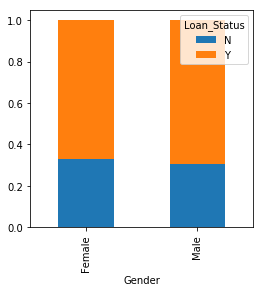

In [153]:
Gender=pd.crosstab(train_original['Gender'],train_original['Loan_Status']) 

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

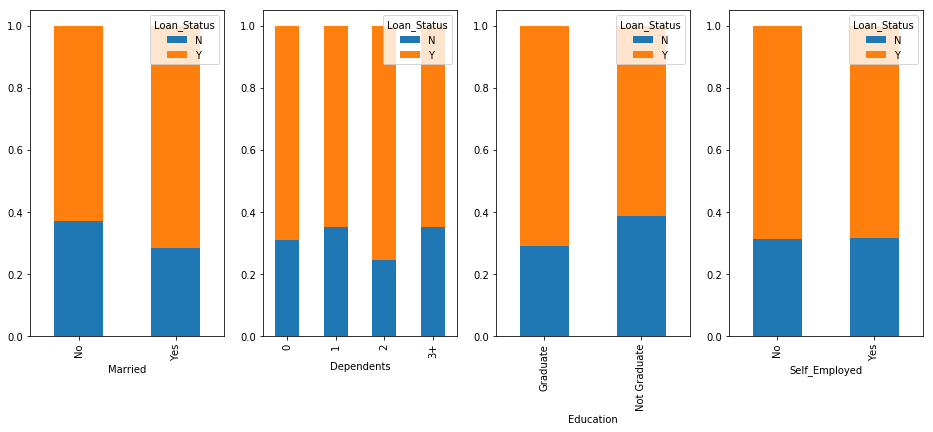

In [154]:
Married=pd.crosstab(train_original['Married'],train_original['Loan_Status']) 
Dependents=pd.crosstab(train_original['Dependents'],train_original['Loan_Status']) 
Education=pd.crosstab(train_original['Education'],train_original['Loan_Status']) 
Self_Employed=pd.crosstab(train_original['Self_Employed'],train_original['Loan_Status']) 

fig, axs = plt.subplots(ncols=4, figsize=(16, 6)) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax = axs[0])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,ax = axs[1]) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax = axs[2])  
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax = axs[3])
plt.show()

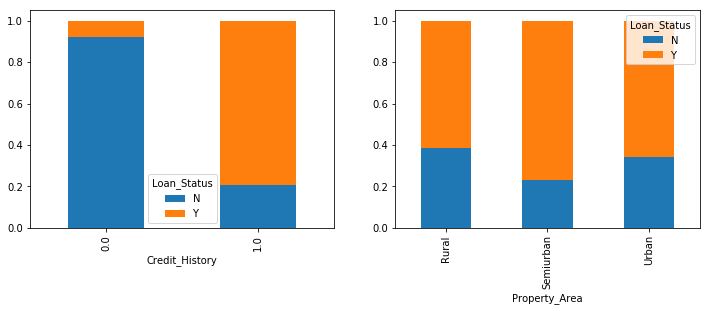

In [155]:
Credit_History=pd.crosstab(train_original['Credit_History'],train_original['Loan_Status']) 
Property_Area=pd.crosstab(train_original['Property_Area'],train_original['Loan_Status'])

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax = axs[0])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax = axs[1])

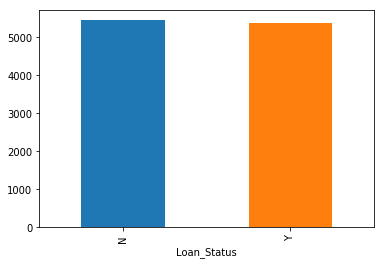

In [156]:
train_original.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

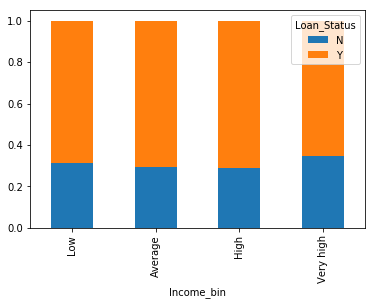

In [157]:
# applicant income vs loan status
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train_original['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

inc_bin = pd.crosstab(train_original['Income_bin'],train_original['Loan_Status'])
inc_bin.div(inc_bin.sum(1).astype(float),axis = 0).plot(kind="bar", stacked=True)


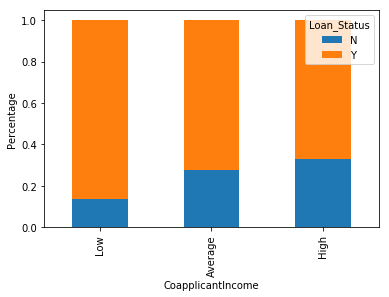

In [158]:
# Co aplicant vs loan status
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train_original['Coapplicant_Income_bin']=pd.cut(train_original['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train_original['Coapplicant_Income_bin'],train_original['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

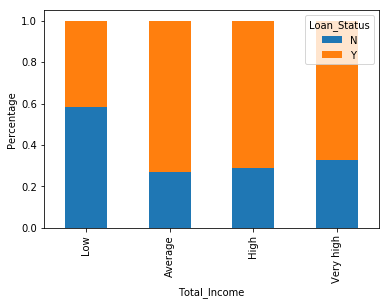

In [159]:
# total income vs loan status
train_original['Total_Income']=train_original['ApplicantIncome']+train_original['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train_original['Total_Income_bin']=pd.cut(train_original['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_original['Total_Income_bin'],train_original['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

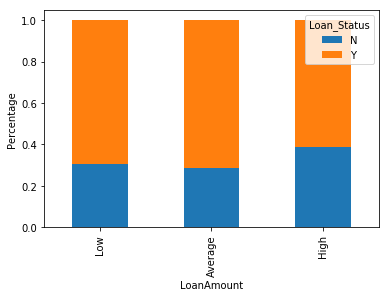

In [160]:
## Loan ammount vs loan status
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train_original['LoanAmount_bin']=pd.cut(train_original['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_original['LoanAmount_bin'],train_original['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [161]:
train_original=train_original.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train_original['Dependents'].replace('3+', 3,inplace=True) 
test_original['Dependents'].replace('3+', 3,inplace=True) 
train_original['Loan_Status'].replace('N', 0,inplace=True) 
train_original['Loan_Status'].replace('Y', 1,inplace=True)

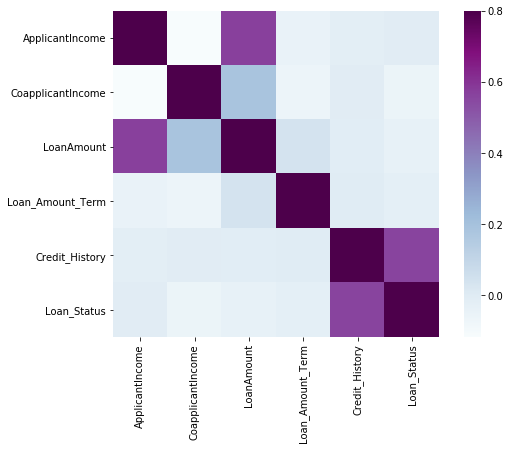

In [162]:
matrix = train_original.corr() 
fig, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [163]:
train_original.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [164]:
train_original['Gender'].mode()

0    Male
dtype: object

In [165]:
train_original['Gender'].fillna(train_original['Gender'].mode()[0], inplace=True) 
train_original['Married'].fillna(train_original['Married'].mode()[0], inplace=True) 
train_original['Dependents'].fillna(train_original['Dependents'].mode()[0], inplace=True) 
train_original['Self_Employed'].fillna(train_original['Self_Employed'].mode()[0], inplace=True) 
train_original['Credit_History'].fillna(train_original['Credit_History'].mode()[0], inplace=True)

In [166]:
train_original['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [167]:
train_original['Loan_Amount_Term'].fillna(train_original['Loan_Amount_Term'].mode()[0], inplace=True)
train_original['LoanAmount'].fillna(train_original['LoanAmount'].median(), inplace=True)

In [168]:
train_original.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [169]:
test_original['Gender'].fillna(test_original['Gender'].mode()[0], inplace=True) 
test_original['Dependents'].fillna(test_original['Dependents'].mode()[0], inplace=True) 
test_original['Self_Employed'].fillna(test_original['Self_Employed'].mode()[0], inplace=True) 
test_original['Credit_History'].fillna(test_original['Credit_History'].mode()[0], inplace=True) 
test_original['Loan_Amount_Term'].fillna(test_original['Loan_Amount_Term'].mode()[0], inplace=True) 
test_original['LoanAmount'].fillna(test_original['LoanAmount'].median(), inplace=True)

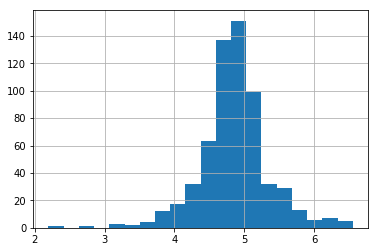

In [170]:
train_original['LoanAmount_log'] = np.log(train_original['LoanAmount'])
train_original['LoanAmount_log'].hist(bins=20)

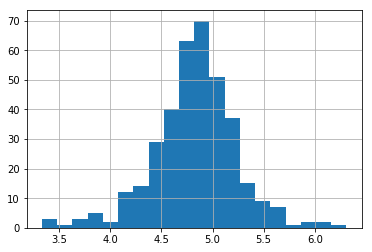

In [171]:
test_original['LoanAmount_log'] = np.log(test_original['LoanAmount']) 
test_original['LoanAmount_log'].hist(bins=20) 


In [172]:
train_original=train_original.drop('Loan_ID',axis=1) 
test_original=test_original.drop('Loan_ID',axis=1)

In [173]:
X = train_original.drop('Loan_Status',axis=1) 
y = train_original.Loan_Status

In [174]:
X=pd.get_dummies(X,drop_first=True) 
#train_original=pd.get_dummies(train_original, drop_first=True) 
test_original=pd.get_dummies(test_original, drop_first=True)

In [175]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,1,0,1,0,0,0,0,0,1


In [ ]:
## Building simple Logistic model

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [185]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression() 
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [186]:
pred_cv = model.predict(x_cv)

print(confusion_matrix(y_cv, pred_cv))
print('\n')
print(classification_report(y_cv, pred_cv))

[[ 23  36]
 [  3 123]]


              precision    recall  f1-score   support

           0       0.88      0.39      0.54        59
           1       0.77      0.98      0.86       126

   micro avg       0.79      0.79      0.79       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.79      0.76       185



In [187]:
## on test data set

pred_test = model.predict(test_original)


In [191]:
pred_test.shape

(367,)

In [192]:
submission=pd.read_csv("Sample_Submission.csv")

submission['Loan_Status']=pred_test 
#submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

#Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [194]:
## Kfold stratified sampling

from sklearn.model_selection import StratifiedKFold

#Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset.

i=1 

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test_original) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [195]:
## Feature Engineering

# Total Income - applicant income plus co applicant income
# EMI - Loan amount/Loan term
# Balance Income - (total income - EMI)

In [196]:
train_original['Total_Income']=train_original['ApplicantIncome']+train_original['CoapplicantIncome'] 
test_original['Total_Income']=test_original['ApplicantIncome']+test_original['CoapplicantIncome']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


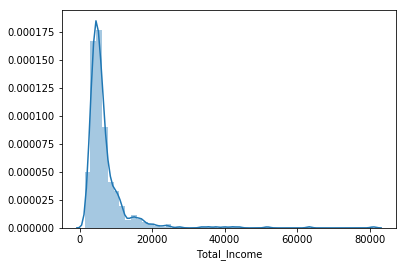

In [197]:
sns.distplot(train_original['Total_Income']);

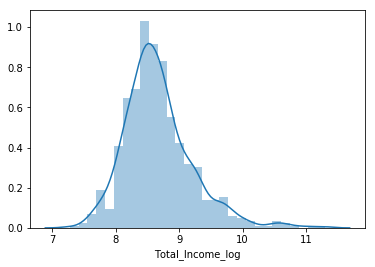

In [198]:
train_original['Total_Income_log'] = np.log(train_original['Total_Income']) 
test_original['Total_Income_log'] = np.log(test_original['Total_Income'])
sns.distplot(train_original['Total_Income_log']); 


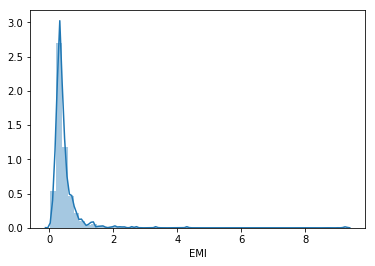

In [199]:
train_original['EMI'] = train_original['LoanAmount']/train_original['Loan_Amount_Term'] 
test_original['EMI'] = test_original['LoanAmount']/test_original['Loan_Amount_Term']


sns.distplot(train_original['EMI']);

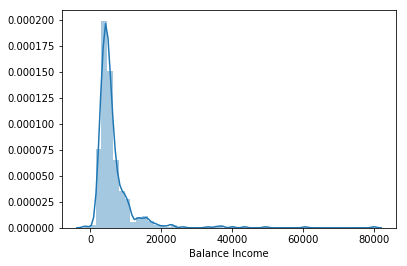

In [200]:


train_original['Balance Income']=train_original['Total_Income']-(train_original['EMI']*1000) # Multiply with 1000 to make the units equal 
test_original['Balance Income']=test_original['Total_Income']-(test_original['EMI']*1000)
sns.distplot(train_original['Balance Income']);

In [201]:
train_original=train_original.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income'], axis=1) 
test_original=test_original.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income'], axis=1)

In [ ]:
##We will build the following models in this section.

# Logistic Regression
# Decision Tree
# Random Forest
# XGBoost

In [203]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender              614 non-null object
Married             614 non-null object
Dependents          614 non-null object
Education           614 non-null object
Self_Employed       614 non-null object
Credit_History      614 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null int64
LoanAmount_log      614 non-null float64
Total_Income_log    614 non-null float64
EMI                 614 non-null float64
Balance Income      614 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 57.6+ KB


In [204]:
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Credit_History             367 non-null float64
LoanAmount_log             367 non-null float64
Gender_Male                367 non-null uint8
Married_Yes                367 non-null uint8
Dependents_0               367 non-null uint8
Dependents_1               367 non-null uint8
Dependents_2               367 non-null uint8
Education_Not Graduate     367 non-null uint8
Self_Employed_Yes          367 non-null uint8
Property_Area_Semiurban    367 non-null uint8
Property_Area_Urban        367 non-null uint8
Total_Income_log           367 non-null float64
EMI                        367 non-null float64
Balance Income             367 non-null float64
dtypes: float64(5), uint8(9)
memory usage: 17.6 KB


In [205]:
X = train_original.drop('Loan_Status',1) 
y = train_original.Loan_Status                # Save target variable in separate dataset


In [206]:
X=pd.get_dummies(X,drop_first=True) 

In [207]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Credit_History             614 non-null float64
LoanAmount_log             614 non-null float64
Total_Income_log           614 non-null float64
EMI                        614 non-null float64
Balance Income             614 non-null float64
Gender_Male                614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: float64(5), uint8(9)
memory usage: 29.5 KB


In [213]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test_original) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.8278688524590164


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [214]:
## Decision Tree

from sklearn import tree

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test_original)



1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.717741935483871

3 of kfold 5
accuracy_score 0.7459016393442623

4 of kfold 5
accuracy_score 0.6721311475409836

5 of kfold 5
accuracy_score 0.7131147540983607


In [215]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

    pred_test = model.predict(test_original)


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.7903225806451613

3 of kfold 5
accuracy_score 0.7459016393442623

4 of kfold 5
accuracy_score 0.7540983606557377

5 of kfold 5
accuracy_score 0.8442622950819673


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [216]:
## Using Grid_search to find best parameters

from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [217]:
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model 
grid_search.fit(x_train,y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [218]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [220]:
## So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. 
## Now let’s build the model using these optimized values.

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test_original) 
    pred2=model.predict_proba(test_original)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.8032786885245902


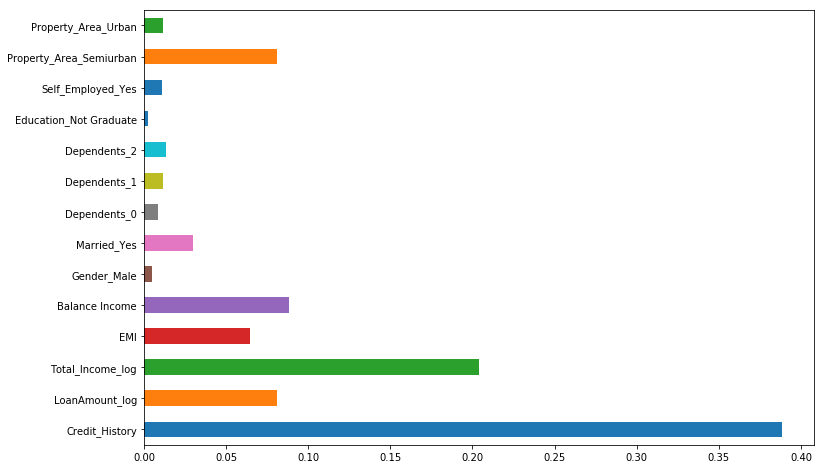

In [221]:
## Let us find the feature importance now, i.e. which features are most important for this problem. 
## We will use feature_importances_ attribute of sklearn to do so.

importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [223]:
## XGBoost

from xgboost import XGBClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    


1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7704918032786885

4 of kfold 5
accuracy_score 0.7622950819672131

5 of kfold 5
accuracy_score 0.7950819672131147
